In [ ]:
# REVIEW

# Vẽ phần chính - Seaborn
# sns.countplot
# sns.barplot
# sns.lineplot
# sns.scatterplot
# sns.histplot
# sns.boxplot
# sns.pairplot

# Làm đẹp - matplotlib
# Tạo một figure với kích thước 10 inches x 10 inches:
plt.figure(figsize=(10, 10))
# Đặt tên:
plt.title("Tên")
# Thay đổi tên trục
plt.xlabel("Tên")
plt.ylabel("Tên")
# Thay đổi dấu chấm trục x tại vị trí 0, 2, 3 thành tên mới "A", "B", "C"
plt.xticks(ticks=[0, 2, 3],
           labels=['A', 'B', 'C'])
# Thay đổi giới hạn của trục y thành 20 đến 40
plt.ylim(20, 40)
# Tạo biểu đồ chung trục
plt.twinx()

# Trực quan hoá dữ liệu với Seaborn


https://seaborn.pydata.org/tutorial/color_palettes.html

![](https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png)
![](https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png)
![](https://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png)

In [ ]:
# Nhập thư viện
import pandas as pd
import seaborn as sns

**Code mẫu để trực quan hoá dữ liệu với seaborn:**

```
sns.barplot(data = dataframe,
            x = 'column_1',
            y = 'column_2')
```





In [ ]:
#  dữ liệu
df = pd.read_csv('demographic_data.csv')
df.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


### sns.countplot
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='Income Group', ylabel='count'>

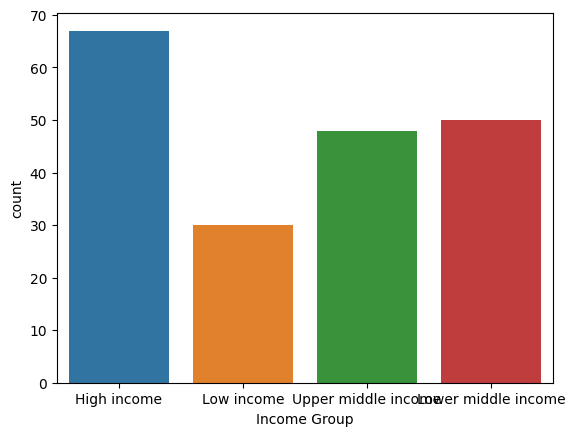

In [ ]:
# Có bao nhiêu quốc gia (Country) trong mỗi nhóm thu nhập (Income Group)
sns.countplot(data=df,
              x='Income Group')

### sns.barplot

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
# Bước 1: chuẩn bị dữ liệu
plot_data = df.groupby('Income Group')['Internet users'].mean().reset_index().sort_values('Internet users')

# Cần reset index để chọn cột 'Income Group' để vẽ

In [ ]:
plot_data

,Income Group,Internet users
1,Low income,5.988333
2,Lower middle income,22.366386
3,Upper middle income,40.279577
0,High income,74.231684


<Axes: xlabel='Income Group', ylabel='Internet users'>

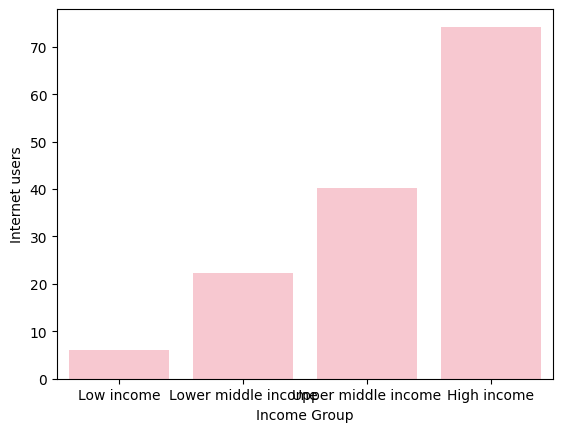

In [ ]:
# Bước 2: Vẽ
sns.barplot(data=plot_data,
            x='Income Group',
            y='Internet users',
            color='pink')

Color name in Seaborn

<img src="https://i.stack.imgur.com/lFZum.png" height=700>

<Axes: xlabel='Internet users', ylabel='Income Group'>

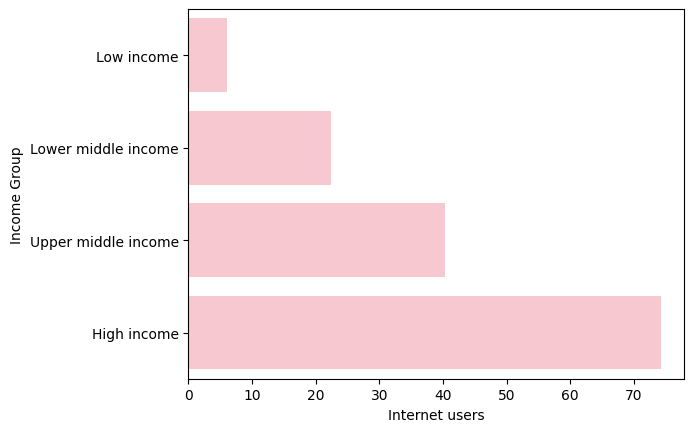

In [ ]:
# Thay đổi bằng syntax của Seaborn
sns.barplot(data=plot_data,
            y='Income Group',
            x='Internet users',
            color='pink',
            order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'],
            orient='h')

In [ ]:
# Đổi thứ tự bars
# Cách một: sắp xếp lại ở dataframe
plot_data = df.groupby('Income Group')['Internet users'].mean().loc[['High income', 'Upper middle income', 'Lower middle income', 'Low income']].reset_index()

In [ ]:
plot_data

,Income Group,Internet users
0,High income,74.231684
1,Upper middle income,40.279577
2,Lower middle income,22.366386
3,Low income,5.988333


<Axes: xlabel='Income Group', ylabel='Internet users'>

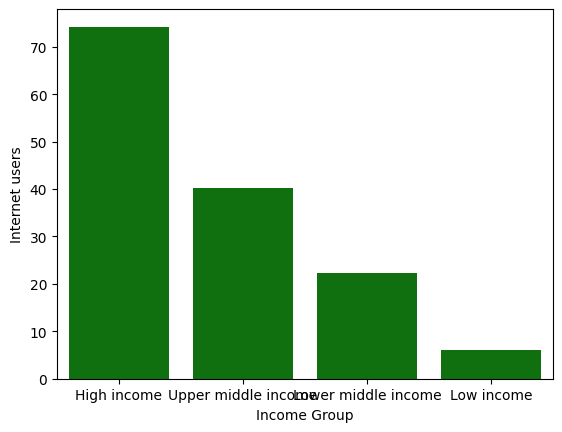

In [ ]:
sns.barplot(data=plot_data,
            x='Income Group',
            y='Internet users',
            color='green')

In [ ]:
plot_data = df.groupby('Income Group')['Internet users'].mean()[['Low income', 'Lower middle income', 'Upper middle income', 'High income']].reset_index()
plot_data

,Income Group,Internet users
0,Low income,5.988333
1,Lower middle income,22.366386
2,Upper middle income,40.279577
3,High income,74.231684


<Axes: xlabel='Income Group', ylabel='Internet users'>

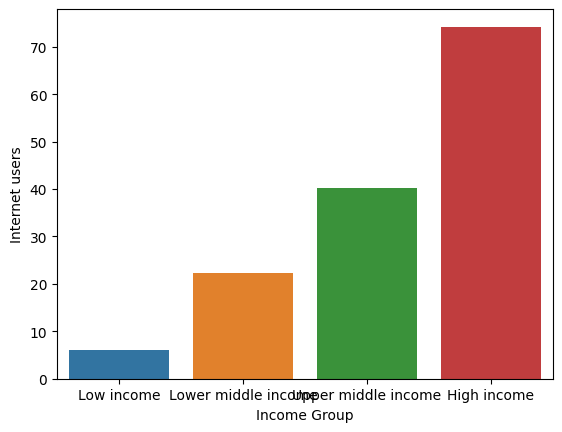

In [ ]:
sns.barplot(data=plot_data,
            x='Income Group',
            y='Internet users')

<Axes: xlabel='Income Group', ylabel='Internet users'>

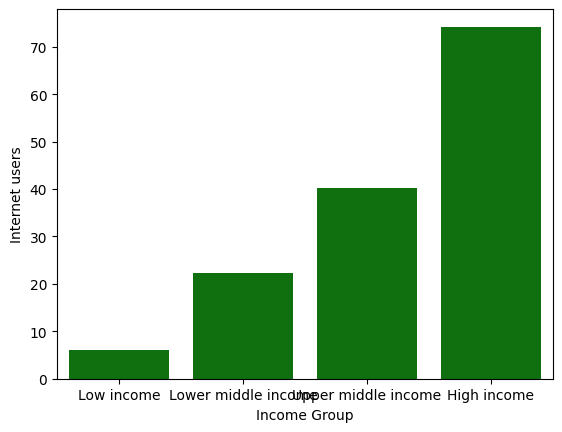

In [ ]:
# Cách 2: thay đổi với syntax seaborn
sns.barplot(data=plot_data,
            x='Income Group',
            y='Internet users',
            color='green',
            order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])

### sns.lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html

<ipython-input-15-1cae1b264780>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_data = df.groupby('Income Group').mean()[['Internet users']].reset_index()


<Axes: xlabel='Income Group', ylabel='Internet users'>

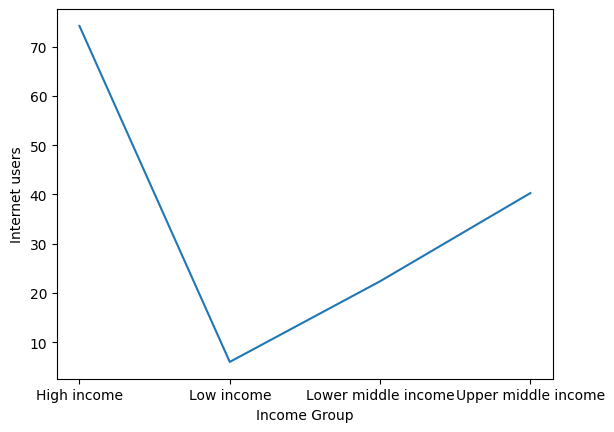

In [ ]:
# Vẽ biểu đồ đường để so sánh tỷ lệ người dùng internet trung bình giữa các nhóm thu nhập
# Bước 1: chuẩn bị dữ liệu
plot_data = df.groupby('Income Group').mean()[['Internet users']].reset_index()
# Bước 2: vẽ
sns.lineplot(data=plot_data, x='Income Group', y='Internet users')

### sns.scatterplot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='Internet users', ylabel='Birth rate'>

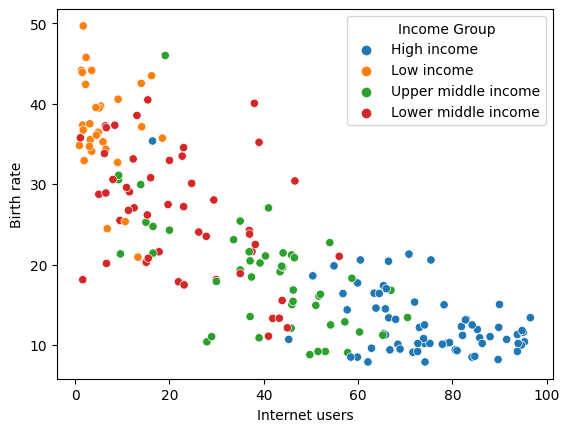

In [ ]:
# Trực quan hoá dữ liệu để mô tả mối tương quan giữa tỷ lệ dùng internet và tỷ lệ sinh
# Tách chiều dữ liệu bằng tham số Hue = "column_name"
sns.scatterplot(data=df,
                x='Internet users',
                y='Birth rate',
                hue='Income Group')

### sns.histplot

https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='Birth rate', ylabel='Count'>

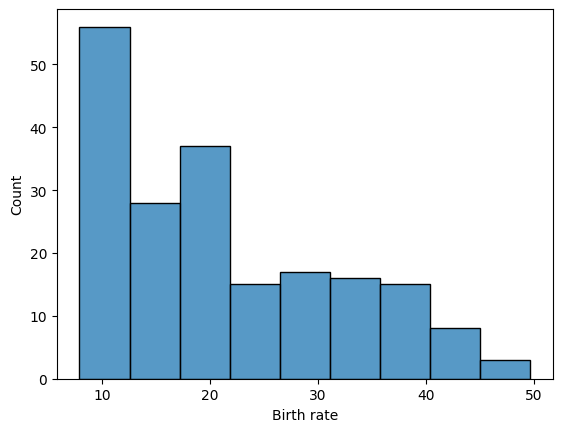

In [ ]:
# Trực quan hoá sự phân phối của tỷ lệ sinh
sns.histplot(data=df,
             x='Birth rate')

### sns.boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Birth rate'>

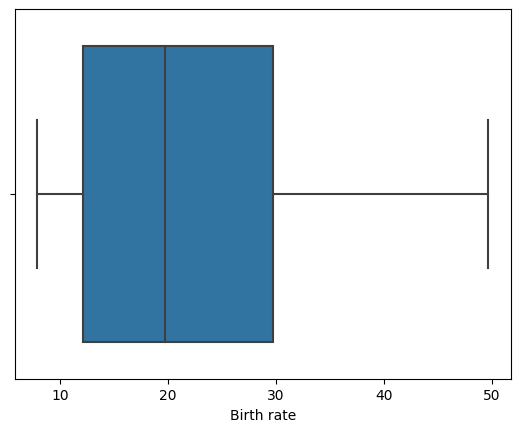

In [ ]:
# trực quan hoá sự phân phối của tỷ lệ sinh
sns.boxplot(data=df,
            x='Birth rate')

### sns.pairplot

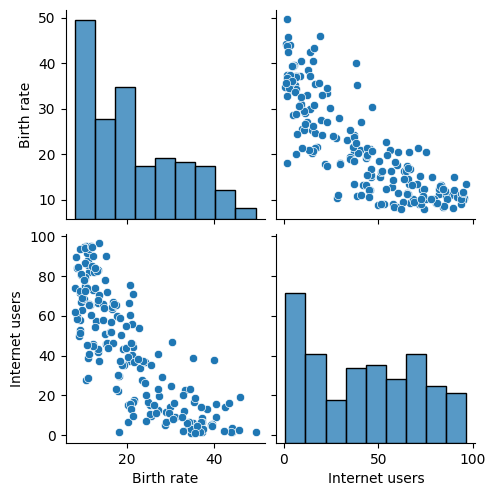

In [ ]:
sns.pairplot(df)